# **Análise exploratória em dados do Ifood**

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

- Perfis de clientes
- Preferências do produto
- Sucessos/fracassos da campanha
- Desempenho do canal


**O objetivo é realizar uma análise exploratória desses dados.**

## **Importando os dados**

Nessa parte iremos importar todas as bibliotecas que iremos precisar para realizar nossa analise e também os dados, dito isso vamos seguir para a importação das bibliotecas e posteriormente dos dados

In [1]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções estatísticas
import statistics
import scipy.stats

Com as bibliotecas importadas podemos seguir para a importação dos dados propriamente dito

In [2]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/mkt_data.csv')

# Observando os primeiro registros
df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


Agora podemos partir para a proxima etapa

## **Análise inicial**

Nessa parte do desafio responderemos algumas perguntas com o intuito de enterdermos um pouco mais de como esses dados se comportam, para isso responderemos as seguintes perguntas:

- Quantos dados temos? Linhas e colunas
- Quais são as colunas numéricas?
- Temos duplicados na nossa base? Se tivermos, retire-os
- Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?
- Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?

Agora que já sabemos as perguntas, vamos partir para a resolução das mesmas.

### **Quantos dados temos? Linhas e colunas**

In [4]:
# Observando as dimensões dos dados
df.shape

(2205, 44)

Dessa forma, podemos observar que temos 2205 linhas e 44 colunas nessa base de dados.

### **Quais são as colunas numéricas?**

In [5]:
# Observando o tipo de dado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

Dessa forma, podemos observar o tipo de dado presente em cada uma das colunas. Temos 2 variáveis categóricas e 42 colunas numéricas, sendo elas:

**Variáveis categóricas:**
 - marital_status        
 - education_level

**Variáveis numéricas:**
- Income
- Kidhome
- Teenhome              
- Recency               
- MntWines              
- MntFruits             
- MntMeatProducts       
- MntFishProducts     
-  MntSweetProducts       
- MntGoldProds          
- NumDealsPurchases
- NumWebPurchases       
- NumCatalogPurchases    
- NumStorePurchases     
- NumWebVisitsMonth    
- AcceptedCmp3        
- AcceptedCmp4         
- AcceptedCmp5          
- AcceptedCmp1          
- AcceptedCmp2          
- Complain             
- Z_CostContact        
-  Z_Revenue             
-  Response              
- Age                   
- Customer_Days       
- marital_Divorced     
- marital_Married      
- marital_Single        
- marital_Together    
- marital_Widow         
- education_2n Cycle    
- education_Basic       
- education_Graduation  
- education_Master     
-  education_PhD         
-  MntTotal              
-  MntRegularProds       
-  AcceptedCmpOverall   
-  kids                
-  expenses             




### **Temos duplicados na nossa base? Se tivermos, retire-os**

In [6]:
# Verificando o valores duplicados
df.duplicated().sum()

0

Podemos observar que nesta base não existem valores duplicados. Sendo assim, podemos seguir adiante.

### **Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?**

In [7]:
# Observando os valores ausentes
def percent_ausentes(df_medias):
    p_faltantes = df_medias.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': df_medias.columns,
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False)

percent_ausentes(df)

,Variavéis,% de ausentes
33,education_Basic,0.975510
31,marital_Widow,0.965533
32,education_2n Cycle,0.910204
27,marital_Divorced,0.895692
35,education_Master,0.834921
36,education_PhD,0.784127
29,marital_Single,0.783673
30,marital_Together,0.742404
28,marital_Married,0.612698
34,education_Graduation,0.495238


Essa função nos retorna a porcentagem de valores ausentes presentes em cada coluna. Podemos observar que existem variáveis com a grande maioria de registros ausentes, como, por exemplo, education_basic, marital_widow e education_2n Cycle, que possuem mais de 90% dos valores ausentes. As variáveis marital_divorced e education_master possuem mais de 80%. Variáveis como education_Phd, marital_single e marital_together possuem um pouco mais de 70% de valores ausentes, enquanto as variáveis marital_married e education_graduation possuem, respectivamente, 61% e 49% de valores ausentes.

Pelo expressivo número de valores ausentes, é possível levantar a hipótese de que os usuários não davam tanta importância para o preenchimento dessas características e acabavam deixando em branco.

Essas variáveis que, em sua grande maioria, possuem valores ausentes, não vão nos dizer nada a respeito dos nossos dados. Portanto, no momento, elas podem ser retiradas do nosso dataset. Vamos aproveitar para retirar também a coluna "Unnamed", já que ela não será utilizada.

In [8]:
# Realizando a exclusão das colunas
df = df.drop(['Unnamed: 0','education_Basic', 'marital_Widow', 'education_2n Cycle', 'marital_Divorced', 'education_Master',
              'education_PhD', 'marital_Single', 'marital_Together', 'marital_Married', 'education_Graduation'], axis = 1)

Agora vamos observar novamente os valores ausentes.

In [9]:
# Observando os valores ausentes
def percent_ausentes(df_medias):
    p_faltantes = df_medias.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': df_medias.columns,
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False)

percent_ausentes(df)

,Variavéis,% de ausentes
0,Income,0.0
17,AcceptedCmp5,0.0
31,kids,0.0
30,education_level,0.0
29,marital_status,0.0
28,AcceptedCmpOverall,0.0
27,MntRegularProds,0.0
26,MntTotal,0.0
25,Customer_Days,0.0
24,Age,0.0


Com os valores ausentes tratados, podemos seguir adiante.

### **Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?**

Como este dataset possui bastante colunas, vamos utilizar o seguinte método para que todas as colunas sejam exibidas corretamente.

In [10]:
# Configurar para exibir todas as colunas
pd.set_option('display.max_columns', None)

Vamos utilizar o método 'describe' para observar essas informações de todas as colunas numéricas de uma só vez.

In [11]:
# Resumo estatístico
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,562.764626,518.707483,0.29932,0.948753,562.764626
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,575.936911,553.847248,0.68044,0.749231,575.936911
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,4.000000,-283.000000,0.00000,0.000000,4.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,56.000000,42.000000,0.00000,0.000000,56.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,343.000000,288.000000,0.00000,1.000000,343.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,964.000000,884.000000,0.00000,1.000000,964.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,2491.000000,2458.000000,4.00000,3.000000,2491.000000


Dessa forma, podemos observar algumas medidas interessantes, como a média de renda, que é de 51.622.

Na coluna "recency", que representa o número de dias desde a última compra, a média é de 49 dias, e o maior número de dias que alguém está sem comprar foi 99 dias.

A média de gastos nos últimos dois anos em vinho é bem superior à de frutas, peixes e doces. No entanto, podemos notar uma mediana bem diferente da média, o que pode ser um indicativo de que existem outliers nessas colunas.

Na coluna "NumWebPurchases", que indica o número de compras através de websites, a média de pedidos é de 4, que por sinal está bem próxima da mediana.

Aparentemente, a maior média de pedidos é feita diretamente na loja, já que eles atingem uma média de 5 pedidos.

A média de idade dessa base é de 51 anos.

Essas são algumas informações que foram possíveis tirar dos dados nesse momento. Vamos seguir com a nossa análise.

## **Entendendo o perfil dos clientes**

Nessa parte vamos utilizar alguns conceitos estatisticos para tentar entender melhor o perfil dos clientes nessa base, para isso precisamos estabelecer algumas perguntas como por exemplo:

- Qual é o maior salário encontrado na nossa base?
- Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income
- Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level
- Quantos clientes temos em cada estado civil? Veja na coluna marital_status

Agora que já sabemos as perguntas, vamos partir para a resolução das mesmas.

### **Qual é o maior salário encontrado na nossa base?**

Vamos utilizar novamente a função 'describe()' para obtermos um resumo estatístico da nossa variável renda.

In [12]:
# Resumo estatístico
df['Income'].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

Podemos observar que a maior renda presente nessa base é de 113 mil, e a menor é de 1730.

### **Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem?**

Para respondermos a essa pergunta, será necessário a criação de um gráfico de dispersão.

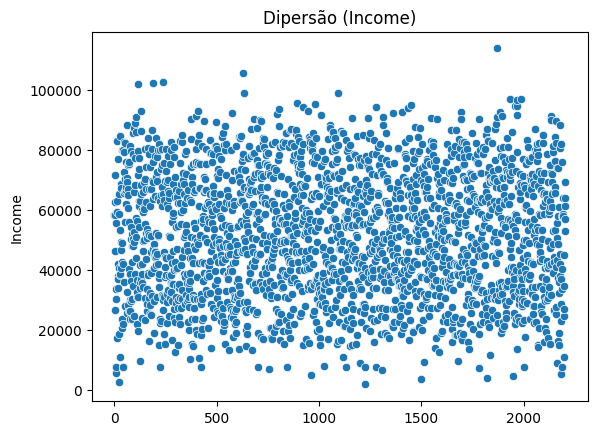

In [13]:
# Criando o gráfico
sns.scatterplot(df['Income'])
plt.title("Dipersão (Income)");

Nesse caso é possivel, confirmar realmente que existem pessoas que ganham muito e outros que não ganham tão bem.

Vamos tentar observar a correlação entre a idade e renda para verificarmos se uma pessoa mais velha tende a ganhar mais.

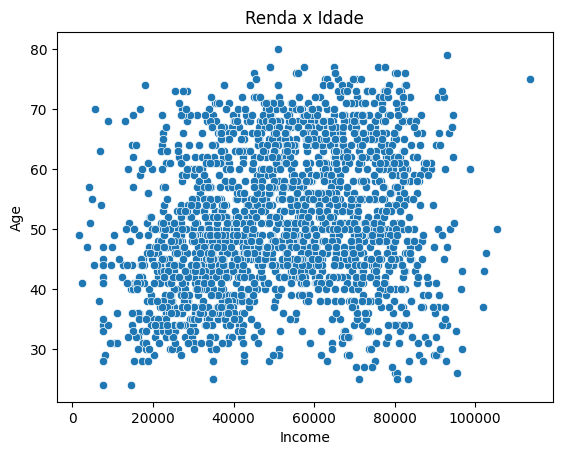

In [14]:
# Criando o gráfico de dispersão
sns.scatterplot(data = df, x = 'Income', y = 'Age')
plt.title("Renda x Idade");

Aparentemente, a renda está bem distribuída em relação à idade. Existem pessoas novas que recebem muito e pessoas mais velhas que também recebem muito.

### **Nossos clientes tem níveis de educação maiores ou menores?**

Vamos utilizar o 'value_counts' para identificarmos quantos registros existem em cada categoria.

In [15]:
# Observando os valores na coluna
df['education_level'].value_counts()

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: education_level, dtype: int64

Podemos perceber então que a maior parte dos clientes presentes nessa base possuem graduação, seguidos por PhD. Então, podemos afirmar que a maior parte dos clientes possui um bom nível educacional.

### **Quantos clientes temos em cada estado civil?**

In [16]:
# Observando os valores na coluna
df['marital_status'].value_counts()

Married     854
Together    568
Single      477
Divorced    230
Widow        76
Name: marital_status, dtype: int64

A maior parte dos nossos clientes são casados, seguidos pelo status de "together".

## **Observando a correlação dos dados**

Para entendermos melhor como esses dados se correlacionam vamos tentar responder as seguintes perguntas:

- Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos?
- Pessoas casadas tendem a gastar mais ?
- As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?
- Pessoas que têm um maior salário gastam mais?

### **Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos?**

In [33]:
# Agrupando os dados
df.groupby("marital_status")["kids"].sum().sort_values(ascending=False)

marital_status
Married     826
Together    557
Single      410
Divorced    232
Widow        67
Name: kids, dtype: int64

Dessa forma, podemos observar que pessoas casadas têm mais filhos, seguidos por pessoas no status "together", que talvez seja um noivado, e em terceiro lugar estão as pessoas solteiras. Portanto, podemos afirmar que as pessoas casadas dessa base realmente têm mais filhos.

### **Pessoas casadas tendem a gastar mais ?**

In [32]:
# Agrupando os dados
df.groupby("marital_status")["expenses"].sum().sort_values(ascending=False)

marital_status
Married     466839
Together    320551
Single      271544
Divorced    130882
Widow        51080
Name: expenses, dtype: int64

Realmente, pessoas casadas tendem a gastar mais.

### **As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?**

Vamos observar a soma de gastos, agrupados pelo número de filhos.

In [34]:
# Agrupando os dados
df.groupby("kids")["expenses"].sum().sort_values(ascending=False)

kids
0    653878
1    483198
2     91951
3     11869
Name: expenses, dtype: int64

Na nossa base, pessoas que não têm filhos tendem a gastar mais. Quanto mais filhos as pessoas têm, menos gastos nossos clientes estão tendo.

### **Pessoas que têm um maior salário gastam mais?**

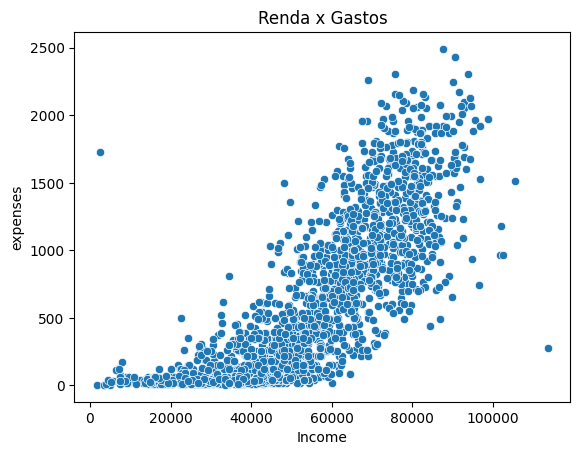

In [20]:
# Criando o gráfico de dispersão
sns.scatterplot(data = df, x = 'Income', y = 'expenses')
plt.title("Renda x Gastos");

Podemos observar que pessoas que ganham acima de 35 mil tendem a gastar cada vez mais conforme o aumento da renda.

## **Conclusões**

A média de renda dos usuários é de R$ 51.000,00. Eles costumam ficar 59 dias sem comprar um produto. Nos últimos 2 anos, os gastos com vinho foram bem maiores que com frutas, peixes, doces ou produtos de ouro.

A maior parte das compras é feita diretamente em lojas, com uma média de 5 pedidos por usuário. A idade média dos usuários é de 51 anos.

A maioria dos clientes possui graduação e é casada. As pessoas casadas são as que mais têm filhos e que gastam mais. No entanto, quanto menos filhos uma pessoa da nossa base tem, menor é o gasto que ela faz.

Quando uma pessoa tem renda maior que R$ 35.000,00, ela tende a gastar mais.

## **O que poderia ser feito com as informações que temos até aqui ?**


Com base nas análises realizadas, existem algumas sugestões que podem estar alinhadas com o intuito de aumentar o lucro da empresa, sendo elas:

**Aumentar a frequência de compra dos clientes.** A média de 59 dias entre uma compra e outra é bastante alta. A empresa pode investir em estratégias para aumentar a frequência de compra, como:

- Ofertas e promoções direcionadas para clientes que não compram há algum tempo;
  - A empresa pode oferecer descontos, brindes ou outros benefícios para incentivar esses clientes a voltarem a comprar.
- Programas de fidelidade que oferecem benefícios aos clientes que compram com frequência;
  - Esses programas podem incluir pontos que podem ser trocados por produtos ou serviços, descontos progressivos ou acesso a eventos exclusivos.

***Foco nos clientes com renda maior que R$ 35.000,00.*** Esses clientes são os que mais gastam, portanto, a empresa deve investir em estratégias para atrair e reter esses clientes. Algumas ideias são:

- Oferecer produtos e serviços de maior valor agregado;
  - A empresa pode oferecer produtos e serviços exclusivos ou personalizados, que atendam às necessidades e aos desejos desses clientes.
- Personalizar a comunicação com esses clientes, de acordo com seus interesses;
  - A empresa pode enviar e-mails, SMS ou mensagens personalizadas, de acordo com os interesses desses clientes (Sempre respeitando as regulamentações da ANATEL e da LGPD).
- Oferecer programas de relacionamento exclusivos para esses clientes;
  - Esses programas podem oferecer benefícios especiais, como descontos, brindes ou acesso a eventos exclusivos.

**Explorar um pouco mais o fato de que seus clientes são, em sua maioria, casados e com filhos.** Esses clientes podem estar interessados em produtos e serviços relacionados à família:

- Oferecer produtos e serviços relacionados à família;
  - A empresa pode focar um pouco mais em produtos para ocasiões especiais, como casamentos, aniversários ou festas de fim de ano.